In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime


## 1.1  EDA Sales Data

In [2]:
!pwd


/home/javier/code/Bakery_sales_forecast/Bakery_sales_foreacst/notebooks


In [3]:
data_sales = pd.read_csv('../raw_data/bakerysales.csv')


In [4]:
data_sales.head()


,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [5]:
df_sales = data_sales.drop(columns=['Unnamed: 0'])
df_sales.head()


,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [6]:
# Converting dates to datetime object
df_sales['date'] = pd.to_datetime(df_sales['date'])
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           234005 non-null  datetime64[ns]
 1   time           234005 non-null  object        
 2   ticket_number  234005 non-null  float64       
 3   article        234005 non-null  object        
 4   Quantity       234005 non-null  float64       
 5   unit_price     234005 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 10.7+ MB


In [7]:
df_sales.head()


,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [8]:
df_sales['hour_min'] = df_sales['time'].apply(lambda x: datetime.strptime(x,'%H:%M' ).time())
df_sales.head()


,date,time,ticket_number,article,Quantity,unit_price,hour_min
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",08:38:00
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",08:38:00
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",09:14:00
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €",09:14:00
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",09:25:00


In [9]:
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           234005 non-null  datetime64[ns]
 1   time           234005 non-null  object        
 2   ticket_number  234005 non-null  float64       
 3   article        234005 non-null  object        
 4   Quantity       234005 non-null  float64       
 5   unit_price     234005 non-null  object        
 6   hour_min       234005 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 12.5+ MB


In [10]:
df_sales.shape


(234005, 7)

In [11]:
df_sales['unit_price'] = df_sales['unit_price'].str.replace("€","").str.replace(",",".")
df_sales.head()


,date,time,ticket_number,article,Quantity,unit_price,hour_min
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,08:38:00
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,08:38:00
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,09:14:00
3,2021-01-02,09:14,150041.0,PAIN,1.0,1.15,09:14:00
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,09:25:00


In [12]:
df_sales['unit_price'] = pd.to_numeric(df_sales['unit_price'])
df_sales.head()


,date,time,ticket_number,article,Quantity,unit_price,hour_min
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,08:38:00
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,08:38:00
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,09:14:00
3,2021-01-02,09:14,150041.0,PAIN,1.0,1.15,09:14:00
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,09:25:00


In [13]:
df_sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   date           234005 non-null  datetime64[ns]
 1   time           234005 non-null  object        
 2   ticket_number  234005 non-null  float64       
 3   article        234005 non-null  object        
 4   Quantity       234005 non-null  float64       
 5   unit_price     234005 non-null  float64       
 6   hour_min       234005 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 12.5+ MB


In [14]:
df_sales.describe()


,date,ticket_number,Quantity,unit_price
count,234005,234005.000000,234005.000000,234005.000000
mean,2021-11-30 11:33:31.049336576,219201.258738,1.538377,1.662195
min,2021-01-02 00:00:00,150040.000000,-200.000000,0.000000
25%,2021-07-03 00:00:00,184754.000000,1.000000,1.100000
50%,2021-11-04 00:00:00,218807.000000,1.000000,1.200000
75%,2022-05-31 00:00:00,253927.000000,2.000000,1.500000
max,2022-09-30 00:00:00,288913.000000,200.000000,60.000000
std,NaN,40053.223896,1.289603,1.722720


In [15]:
# Setting dates as the index
df_sales.set_index(['date'], inplace=True)
df_sales.head()


,time,ticket_number,article,Quantity,unit_price,hour_min
date,,,,,,
2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90,08:38:00
2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20,08:38:00
2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20,09:14:00
2021-01-02,09:14,150041.0,PAIN,1.0,1.15,09:14:00
2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20,09:25:00


## 1.2 EDA Weather Data

In [16]:
data_weather = pd.read_csv('../raw_data/paris_weather.csv')


In [17]:
df_weather = data_weather
df_weather.head()


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,SUNSET,SUNRISE,TEMPERATURE_NIGHT_C
0,01/01/2021,3,2,7,2,3,3,0.5,86,7.750,...,116,332,122,0.3,1,3.2,météo très défavorable,17:05:00,08:44:00,2
1,02/01/2021,5,-1,7,2,4,4,0.1,76,10.000,...,122,116,116,0.0,1,8.6,météo très défavorable,17:06:00,08:44:00,3
2,03/01/2021,4,2,10,3,3,3,0.3,92,10.000,...,122,116,119,0.0,1,8.6,météo très défavorable,17:07:00,08:44:00,3
3,04/01/2021,3,2,13,2,2,3,1.0,95,6.875,...,332,326,332,0.7,1,3.2,météo très défavorable,17:08:00,08:44:00,2
4,05/01/2021,3,2,14,2,2,3,0.4,94,7.750,...,326,332,371,0.1,1,3.2,météo très défavorable,17:09:00,08:43:00,2


In [18]:
df_weather.shape


(638, 25)

In [19]:
df_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    638 non-null    object 
 1   MAX_TEMPERATURE_C       638 non-null    int64  
 2   MIN_TEMPERATURE_C       638 non-null    int64  
 3   WINDSPEED_MAX_KMH       638 non-null    int64  
 4   TEMPERATURE_MORNING_C   638 non-null    int64  
 5   TEMPERATURE_NOON_C      638 non-null    int64  
 6   TEMPERATURE_EVENING_C   638 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     638 non-null    float64
 8   HUMIDITY_MAX_PERCENT    638 non-null    int64  
 9   VISIBILITY_AVG_KM       638 non-null    float64
 10  PRESSURE_MAX_MB         638 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  638 non-null    float64
 12  HEATINDEX_MAX_C         638 non-null    int64  
 13  DEWPOINT_MAX_C          638 non-null    int64  
 14  WINDTEMP_MAX_C          638 non-null    in

In [20]:
# Converting date in format dd/mm/yyy to yyyy-mm-dd datetime type
def convert_to_date(date_string):
    date_list = date_string.split("/")
    _day, _month, _year = date_list[0], date_list[1], date_list[2]
    date_str = _year+"-"+_month+"-"+_day
    return datetime.strptime(date_str, '%Y-%m-%d').date()


In [21]:
df_weather['date'] = df_weather['DATE'].apply(convert_to_date)
df_weather['date'] = pd.to_datetime(df_weather['date'])
# Drops old DATE column
df_weather = df_weather.drop(columns=['DATE'])


In [22]:
df_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   MAX_TEMPERATURE_C       638 non-null    int64         
 1   MIN_TEMPERATURE_C       638 non-null    int64         
 2   WINDSPEED_MAX_KMH       638 non-null    int64         
 3   TEMPERATURE_MORNING_C   638 non-null    int64         
 4   TEMPERATURE_NOON_C      638 non-null    int64         
 5   TEMPERATURE_EVENING_C   638 non-null    int64         
 6   PRECIP_TOTAL_DAY_MM     638 non-null    float64       
 7   HUMIDITY_MAX_PERCENT    638 non-null    int64         
 8   VISIBILITY_AVG_KM       638 non-null    float64       
 9   PRESSURE_MAX_MB         638 non-null    int64         
 10  CLOUDCOVER_AVG_PERCENT  638 non-null    float64       
 11  HEATINDEX_MAX_C         638 non-null    int64         
 12  DEWPOINT_MAX_C          638 non-null    int64     

In [23]:
# Creates cyclical month feature according to the date
df_weather['month'] = df_weather.date.dt.month
# Assuming we have a 12 month period (e.g., month in a year)
period = 12

# Convert 'month' to radians
df_weather['month_radians'] = 2 * np.pi * df_weather['month'] / period

# Create new features using sine and cosine
df_weather['month_sin'] = np.sin(df_weather['month_radians'])
df_weather['month_cos'] = np.cos(df_weather['month_radians'])
# Dropping ['month_radians']
df_weather.drop(columns=['month_radians', 'month'], inplace=True)


In [24]:
df_weather.head()


,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,SUNSET,SUNRISE,TEMPERATURE_NIGHT_C,date,month_sin,month_cos
0,3,2,7,2,3,3,0.5,86,7.750,1014,...,0.3,1,3.2,météo très défavorable,17:05:00,08:44:00,2,2021-01-01,0.5,0.866025
1,5,-1,7,2,4,4,0.1,76,10.000,1015,...,0.0,1,8.6,météo très défavorable,17:06:00,08:44:00,3,2021-01-02,0.5,0.866025
2,4,2,10,3,3,3,0.3,92,10.000,1016,...,0.0,1,8.6,météo très défavorable,17:07:00,08:44:00,3,2021-01-03,0.5,0.866025
3,3,2,13,2,2,3,1.0,95,6.875,1015,...,0.7,1,3.2,météo très défavorable,17:08:00,08:44:00,2,2021-01-04,0.5,0.866025
4,3,2,14,2,2,3,0.4,94,7.750,1017,...,0.1,1,3.2,météo très défavorable,17:09:00,08:43:00,2,2021-01-05,0.5,0.866025


In [25]:
# Generates periodical features for SUNRISE and SUNSET

# Creates cyclical time feature according to the SUNRISE time
df_weather['sunrise_time'] = pd.to_datetime(df_weather['SUNRISE']).dt.hour*60+pd.to_datetime(df_weather['SUNRISE']).dt.minute
# Assuming we have a 1440 minutes in period (e.g., minutes  in a day)
period = 1440

# Convert 'month' to radians
df_weather['sunrise_time_radians'] = 2 * np.pi * df_weather['sunrise_time'] / period

# Create new features using sine and cosine
df_weather['sunrise_time_sin'] = np.sin(df_weather['sunrise_time_radians'])
df_weather['sunrise_time_cos'] = np.cos(df_weather['sunrise_time_radians'])
# Dropping ['sunrise_time_radians']
df_weather.drop(columns=['sunrise_time_radians', 'sunrise_time', 'SUNRISE'], inplace=True)


/tmp/ipykernel_418487/1974141495.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_weather['sunrise_time'] = pd.to_datetime(df_weather['SUNRISE']).dt.hour*60+pd.to_datetime(df_weather['SUNRISE']).dt.minute
/tmp/ipykernel_418487/1974141495.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_weather['sunrise_time'] = pd.to_datetime(df_weather['SUNRISE']).dt.hour*60+pd.to_datetime(df_weather['SUNRISE']).dt.minute


In [26]:
# Creates cyclical time feature according to the SUNRISE time
df_weather['sunset_time'] = pd.to_datetime(df_weather['SUNSET']).dt.hour*60+pd.to_datetime(df_weather['SUNSET']).dt.minute
# Assuming we have a 1440 minutes in period (e.g., minutes  in a day)
period = 1440

# Convert 'month' to radians
df_weather['sunset_time_radians'] = 2 * np.pi * df_weather['sunset_time'] / period

# Create new features using sine and cosine
df_weather['sunset_time_sin'] = np.sin(df_weather['sunset_time_radians'])
df_weather['sunset_time_cos'] = np.cos(df_weather['sunset_time_radians'])
# Dropping ['sunset_time_radians']
df_weather.drop(columns=['sunset_time_radians', 'sunset_time', 'SUNSET'], inplace=True)


/tmp/ipykernel_418487/2092115827.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_weather['sunset_time'] = pd.to_datetime(df_weather['SUNSET']).dt.hour*60+pd.to_datetime(df_weather['SUNSET']).dt.minute
/tmp/ipykernel_418487/2092115827.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_weather['sunset_time'] = pd.to_datetime(df_weather['SUNSET']).dt.hour*60+pd.to_datetime(df_weather['SUNSET']).dt.minute


In [27]:
df_weather.head()


,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,SUNHOUR,OPINION,TEMPERATURE_NIGHT_C,date,month_sin,month_cos,sunrise_time_sin,sunrise_time_cos,sunset_time_sin,sunset_time_cos
0,3,2,7,2,3,3,0.5,86,7.750,1014,...,3.2,météo très défavorable,2,2021-01-01,0.5,0.866025,0.754710,-0.656059,-0.971342,-0.237686
1,5,-1,7,2,4,4,0.1,76,10.000,1015,...,8.6,météo très défavorable,3,2021-01-02,0.5,0.866025,0.754710,-0.656059,-0.972370,-0.233445
2,4,2,10,3,3,3,0.3,92,10.000,1016,...,8.6,météo très défavorable,3,2021-01-03,0.5,0.866025,0.754710,-0.656059,-0.973379,-0.229200
3,3,2,13,2,2,3,1.0,95,6.875,1015,...,3.2,météo très défavorable,2,2021-01-04,0.5,0.866025,0.754710,-0.656059,-0.974370,-0.224951
4,3,2,14,2,2,3,0.4,94,7.750,1017,...,3.2,météo très défavorable,2,2021-01-05,0.5,0.866025,0.757565,-0.652760,-0.975342,-0.220697


In [28]:
#  Setting new date column as index
df_weather.set_index(['date'], inplace=True)
df_weather.head()


,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,UV_INDEX,SUNHOUR,OPINION,TEMPERATURE_NIGHT_C,month_sin,month_cos,sunrise_time_sin,sunrise_time_cos,sunset_time_sin,sunset_time_cos
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,3,2,7,2,3,3,0.5,86,7.750,1014,...,1,3.2,météo très défavorable,2,0.5,0.866025,0.754710,-0.656059,-0.971342,-0.237686
2021-01-02,5,-1,7,2,4,4,0.1,76,10.000,1015,...,1,8.6,météo très défavorable,3,0.5,0.866025,0.754710,-0.656059,-0.972370,-0.233445
2021-01-03,4,2,10,3,3,3,0.3,92,10.000,1016,...,1,8.6,météo très défavorable,3,0.5,0.866025,0.754710,-0.656059,-0.973379,-0.229200
2021-01-04,3,2,13,2,2,3,1.0,95,6.875,1015,...,1,3.2,météo très défavorable,2,0.5,0.866025,0.754710,-0.656059,-0.974370,-0.224951
2021-01-05,3,2,14,2,2,3,0.4,94,7.750,1017,...,1,3.2,météo très défavorable,2,0.5,0.866025,0.757565,-0.652760,-0.975342,-0.220697


In [29]:

df_weather['OPINION'].value_counts()


OPINION
météo favorable           182
météo défavorable         153
météo très défavorable    144
météo correcte            126
météo idéale               33
Name: count, dtype: int64

In [30]:
# Creating the dictionary for the weather comments and converting OPINION to numbers
dict_meteo = {
'météo idéale': 4,
'météo favorable': 3,
'météo correcte': 2,
'météo défavorable': 1,
'météo très défavorable': 0
}
df_weather['opinion'] = df_weather['OPINION'].map(dict_meteo)
df_weather.drop(columns= ['OPINION'], inplace=True)
df_weather.head()


,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,...,UV_INDEX,SUNHOUR,TEMPERATURE_NIGHT_C,month_sin,month_cos,sunrise_time_sin,sunrise_time_cos,sunset_time_sin,sunset_time_cos,opinion
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,3,2,7,2,3,3,0.5,86,7.750,1014,...,1,3.2,2,0.5,0.866025,0.754710,-0.656059,-0.971342,-0.237686,0
2021-01-02,5,-1,7,2,4,4,0.1,76,10.000,1015,...,1,8.6,3,0.5,0.866025,0.754710,-0.656059,-0.972370,-0.233445,0
2021-01-03,4,2,10,3,3,3,0.3,92,10.000,1016,...,1,8.6,3,0.5,0.866025,0.754710,-0.656059,-0.973379,-0.229200,0
2021-01-04,3,2,13,2,2,3,1.0,95,6.875,1015,...,1,3.2,2,0.5,0.866025,0.754710,-0.656059,-0.974370,-0.224951,0
2021-01-05,3,2,14,2,2,3,0.4,94,7.750,1017,...,1,3.2,2,0.5,0.866025,0.757565,-0.652760,-0.975342,-0.220697,0


In [31]:
df_weather.dtypes


MAX_TEMPERATURE_C           int64
MIN_TEMPERATURE_C           int64
WINDSPEED_MAX_KMH           int64
TEMPERATURE_MORNING_C       int64
TEMPERATURE_NOON_C          int64
TEMPERATURE_EVENING_C       int64
PRECIP_TOTAL_DAY_MM       float64
HUMIDITY_MAX_PERCENT        int64
VISIBILITY_AVG_KM         float64
PRESSURE_MAX_MB             int64
CLOUDCOVER_AVG_PERCENT    float64
HEATINDEX_MAX_C             int64
DEWPOINT_MAX_C              int64
WINDTEMP_MAX_C              int64
WEATHER_CODE_MORNING        int64
WEATHER_CODE_NOON           int64
WEATHER_CODE_EVENING        int64
TOTAL_SNOW_MM             float64
UV_INDEX                    int64
SUNHOUR                   float64
TEMPERATURE_NIGHT_C         int64
month_sin                 float64
month_cos                 float64
sunrise_time_sin          float64
sunrise_time_cos          float64
sunset_time_sin           float64
sunset_time_cos           float64
opinion                     int64
dtype: object

## 2.1 Feature assessment

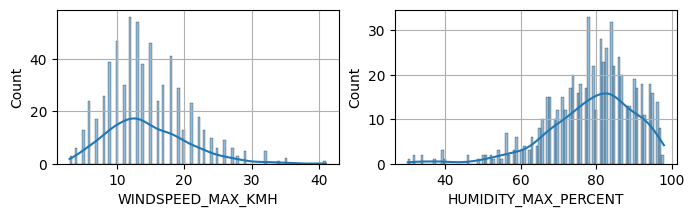

In [46]:
# Destructuring initialization
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(8,2)) # axs is a (1,2) nd-array

sns.histplot(df_weather['WINDSPEED_MAX_KMH'], bins=100,kde = True, ax=ax1);
ax1.grid()

sns.histplot(df_weather['HUMIDITY_MAX_PERCENT'], bins=100,kde = True, ax=ax2);
ax2.grid()
